<a href="https://www.kaggle.com/code/sjagkoo7/boston-house-prediction-dataset-practise-am?scriptVersionId=140531584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price.
The following describes the dataset columns:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


# Reading the Dataset

In [2]:
columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
house=pd.read_csv("/kaggle/input/boston-house-prices/housing.csv",header=None,delimiter=r"\s+",names=columns)

* `header = None` - it means if column names are passed explicitly then the behavior is identical to`header=None` otherwise it won't consider first row of datset which was acting as row name before passing the row names.
* `delimiter=r"\s+"` - row dataset is given as data seperate with space so `r` is regular expression and `\s` is for white space and `+` is for Matches one or more of the preceding character. if it is comma then `\,`.

`Metacharacter      Meaning`

`.                 Matches any character`

`*                 Matches zero or more of the preceding character`

`+                 Matches one or more of the preceding character
?                  Matches zero or one of the preceding character
{n}                Matches exactly n times of the preceding character
{n,m}              Matches at least n and at most m times of the preceding character
\w                 Matches any alphanumeric character
\d                 Matches any digit
\s                 Matches any whitespace character
\t                 Matches a tab character
\n                 Matches a newline character`

In [4]:
# Renaming - 'MEDV' to 'Price' - it is a target  feature which we have to  predict
house=house.rename(columns={"MEDV": "PRICE"})

In [5]:
# displaying first two rows
house.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


# Pre-Processing

In [6]:
house.info()
#house.shape
#len(house)
#house.nunique()
#house.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
#len(house.columns)
house.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

In [8]:
# Identifying the unique number of values in the dataset
house.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [9]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Handling Null Values

In [10]:
# Check for missing values
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [11]:
# See rows with missing values
house[house.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


# Pre-Processing - Summary

In [12]:
summary=pd.DataFrame(index=house.columns)
summary['count']=house.count()
summary['nunique']=house.nunique()
summary['null']=house.isna().sum()
summary['dtype']=house.dtypes
summary=pd.concat([summary,house.describe().T.drop('count',axis=1)],axis=1)
summary

,count,nunique,null,dtype,mean,std,min,25%,50%,75%,max
CRIM,506,504,0,float64,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506,26,0,float64,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506,76,0,float64,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506,2,0,int64,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506,81,0,float64,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506,446,0,float64,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506,356,0,float64,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506,412,0,float64,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506,9,0,int64,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506,66,0,float64,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Visualization - Co-Relation Matrix

In [13]:
# Finding out the correlation between the features
corr=house.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0.5, 1.0, 'Correlation Matrix\n')

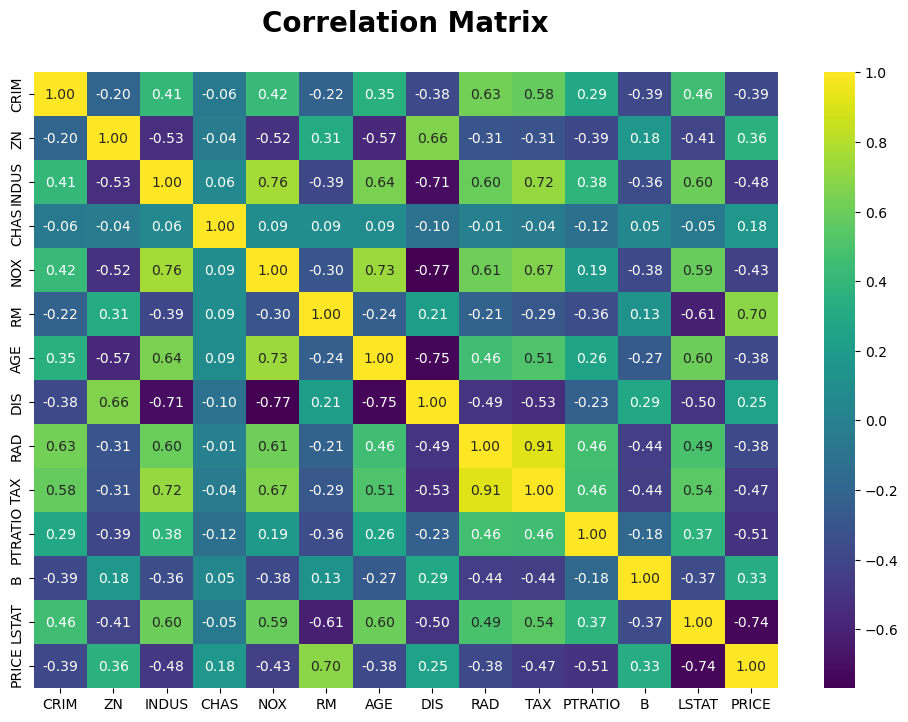

In [14]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True, fmt=".2f",cmap='viridis')
plt.title('Correlation Matrix\n',fontsize = 20, weight = 'bold')

# Visualization - Outliers

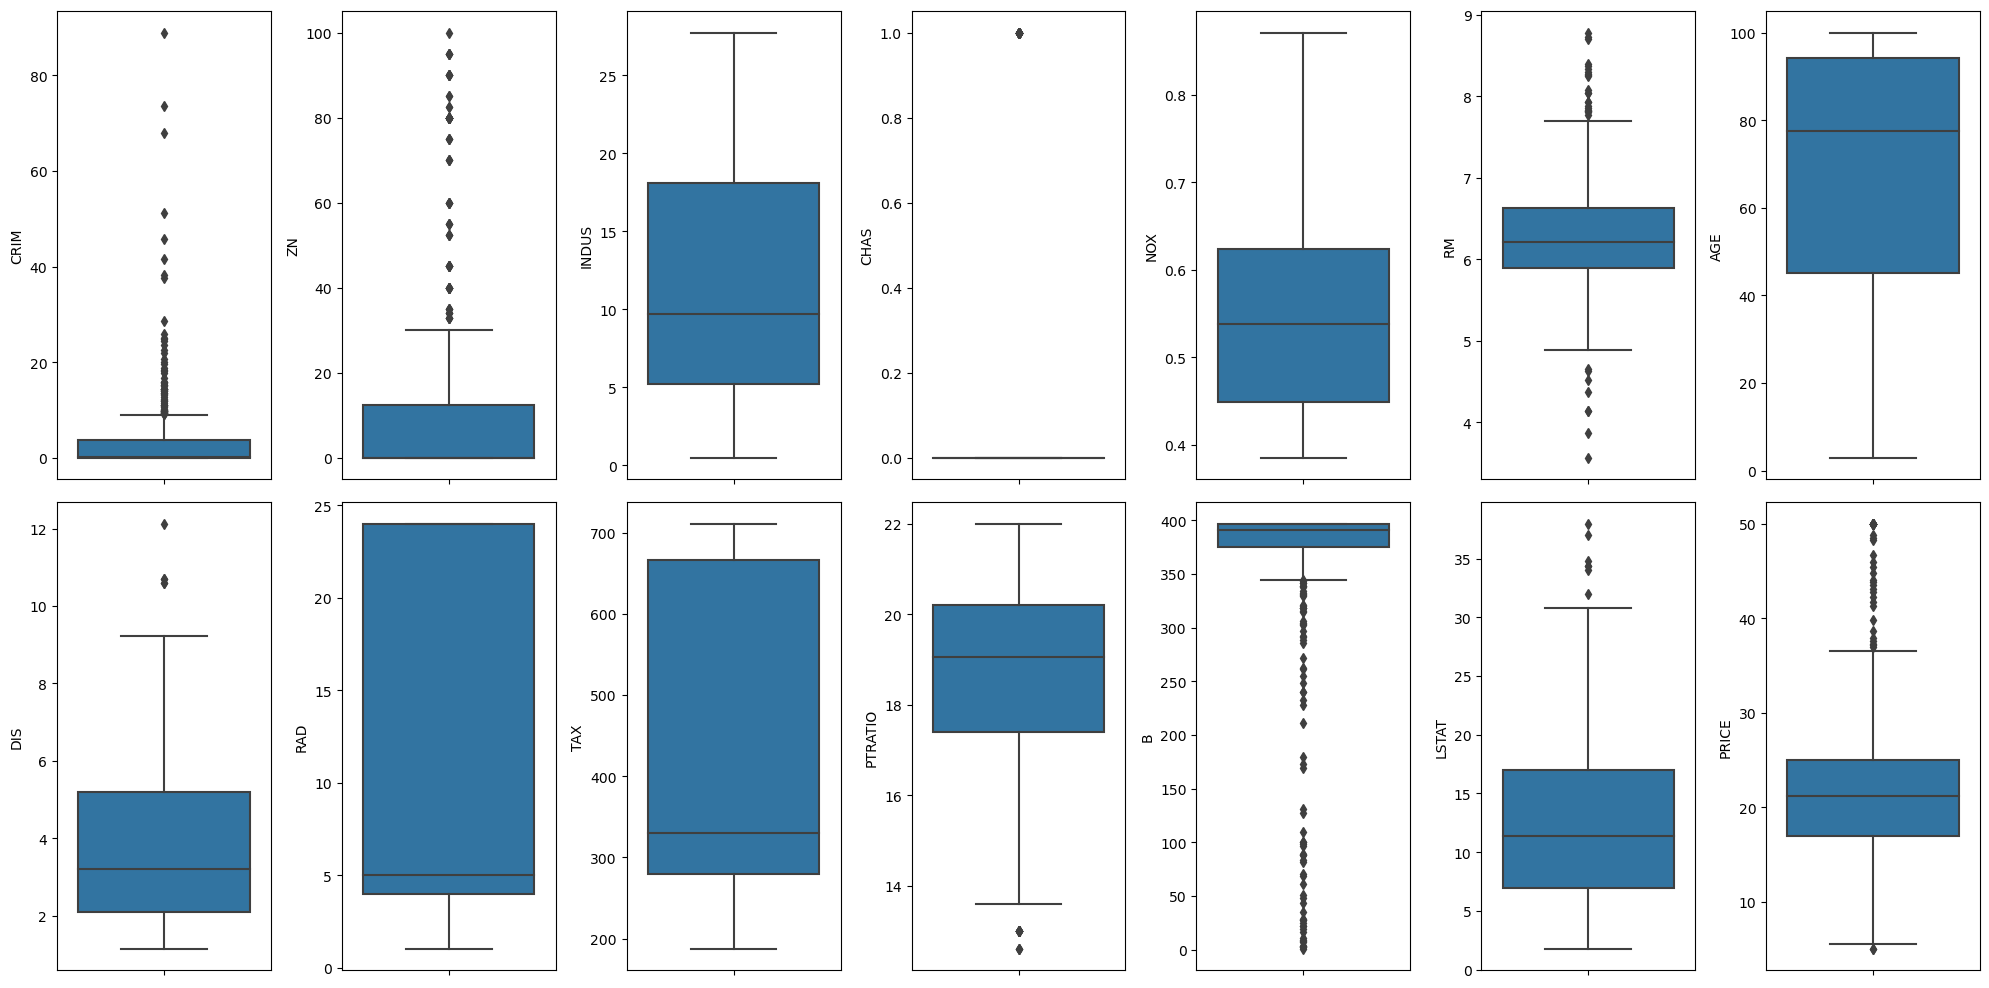

In [15]:
plt.figure(figsize=(20,10))
col=house.columns.to_list()
# plt.subplots(nrows=2, ncols=7) #
for i in range (len(col)):
    plt.subplot(2,7,i+1)
    sns.boxplot(data=house,y=col[i])
plt.tight_layout()

So these feature having outliers - `CRIM,ZN,RM,B,LSTAT,PRICE`.Outlier is a kind of data that is significantly different from the rest of the data which will impact the prediction. Either we have to remove or there will be less accuracy in prediction if won't remove the outliers.

# Visualization - Feature Distribution

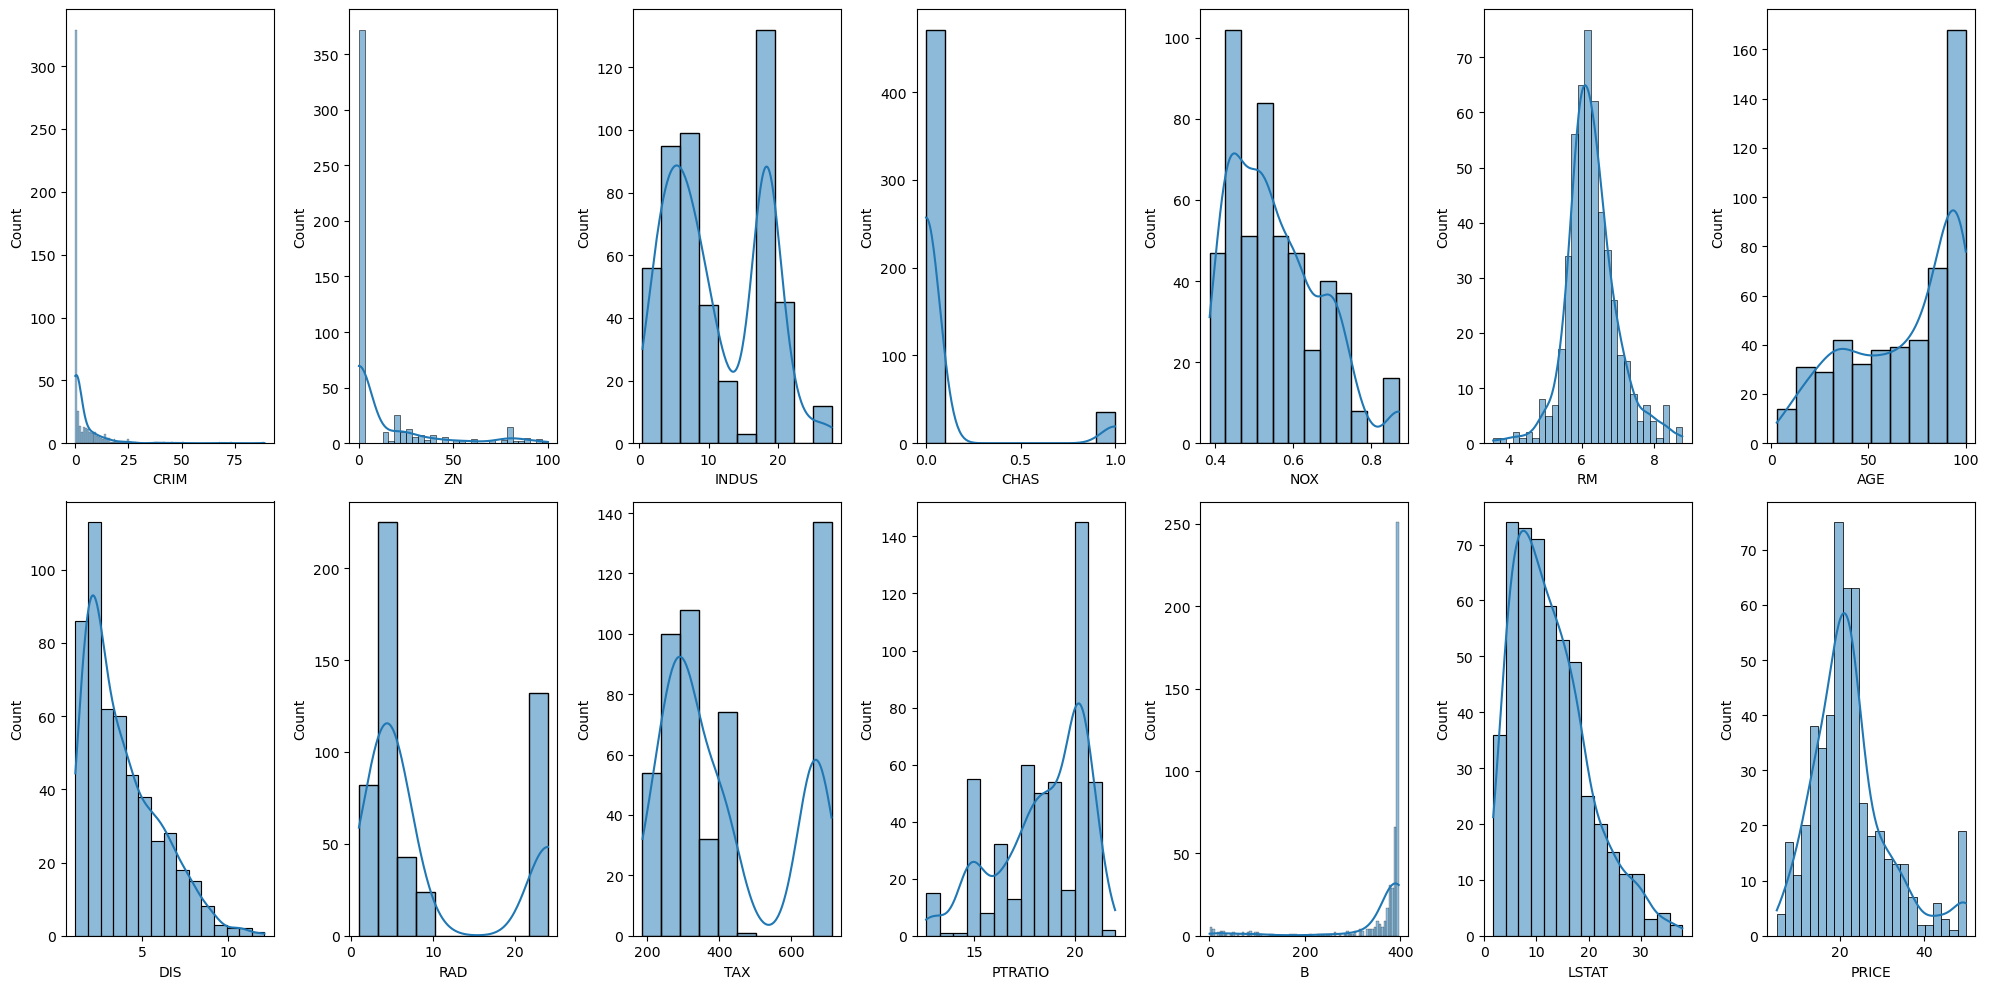

In [16]:
plt.figure(figsize=(20,10))
col=house.columns.to_list()
for i in range (len(col)):
    plt.subplot(2,7,i+1)
    sns.histplot(data=house,x=col[i],kde=True)
plt.tight_layout()

So feature `CRIM,ZN,B` is not distributed normally. It's having skewness means these need to remove otherwise it will lead to less accuracy like  same thing we have seen this in outliers.

# Feature Scaling

In [17]:
# Spliting target variable and independent variables
#X= independent variables  or explanatory variable or causes variable
#y= target variable or final goal
X=house.drop('PRICE',axis=1)
y=house['PRICE']
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_Scaled=scaler.fit_transform(X)
X_Scaled=pd.DataFrame(X_Scaled,columns=X.columns)
X_Scaled.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.0,0.08968
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.0,0.20447


Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

# Cross Validation

* `Cross-validation (CV):` Cross-validation (CV) is a fundamental technique used in machine learning to assess the performance and generalization of a model. It involves partitioning the dataset into subsets for training and testing, allowing the model to be evaluated on different subsets of data.
​
* `Holdout Validation (Train-Test Split):`
* In this technique of cross-validation, the whole dataset is randomly partitioned into a training set and validation set. Using a rule of thumb nearly 70% of the whole dataset is used as a training set and the remaining 30% is used as the validation set.
* `Often used when the dataset is large.Not Suitable for an imbalanced dataset.`
​
* `K-Fold Cross-Validation:`
* In this technique of K-Fold cross-validation, the whole dataset is partitioned into K parts of equal size. Each partition is called a “Fold“.So as we have K parts we call it K-Folds. 
* One Fold is used as a validation set and the remaining K-1 folds are used as the training set.
* The technique is repeated K times until each fold is used as a validation set and the remaining folds as the training set.
* `The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.`
* `Not to be used for imbalanced datasets.Not suitable for Time Series data.`
    
* `Stratified K-Fold Cross-Validation:`
* Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.
* `Not suitable for Time Series data.`
​
* `Leave Pout Cross-validation:`
* LeavePOut cross-validation is an exhaustive cross-validation technique, in which p-samples are used as the validation set and remaining n-p samples are used as the training set.
* This process is repeated till the whole dataset gets divided on the validation set of p-samples and n-p training samples.
* `High computation time,Not Suitable for Imbalanced dataset`
​
* `Leave One Out Cross-validation:`
* LeaveOneOut cross-validation is an exhaustive cross-validation technique in which 1 sample point is used as a validation set and the remaining n-1 samples are used as the training set. Thus the process is repeated till every sample of the dataset is used as a validation point.
​
* `Time Series ( Rolling cross-validation):`
* Split the data into training and validation set according to time, also called as “Forward chaining” method or rolling cross-validation.
* Start with a small subset of data as the training set. Based on that set we predict later data points and then check the accuracy.
* The Predicted samples are then included as part of the next training dataset and subsequent samples are forecasted.
* `Not suitable for validation of other data types.`

In [19]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5)

# Cross Validation - Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
score=cross_val_score(lr,X_Scaled,y,cv=kf)
print(f"Validation Score : {score} ")
print(f"Average Score :{score.mean()}")

Validation Score : [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154] 
Average Score :0.3532759243958826


# Cross Validation - Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="squared_error",random_state=42)
score=cross_val_score(dtr,X_Scaled,y,cv=kf)
print(f"Validation Score : {score} ")
print(f"Average Score :{score.mean()}")

Validation Score : [ 0.62998247  0.59961443  0.60584919  0.38127625 -1.14229804] 
Average Score :0.214884862562573


# Cross Validation - KNeighbours Regressor

In [22]:
from sklearn.neighbors  import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
score=cross_val_score(knr,X_Scaled,y,cv=kf)
print(f"Validation Score : {score} ")
print(f"Average Score :{score.mean()}")

Validation Score : [0.55864439 0.43355829 0.15686648 0.38505139 0.41923811] 
Average Score :0.3906717325333763


# Cross Validation - Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,criterion="squared_error",random_state=42)
score=cross_val_score(rfr,X_Scaled,y,cv=kf)
print(f"Validation Score : {score} ")
print(f"Average Score :{score.mean()}")

Validation Score : [0.77207873 0.85748381 0.74327602 0.46999959 0.29452401] 
Average Score :0.6274724309095834


# Cross Validation - Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,criterion="friedman_mse",random_state=42)
score=cross_val_score(gbr,X_Scaled,y,cv=kf)
print(f"Validation Score : {score} ")
print(f"Average Score :{score.mean()}")

Validation Score : [0.78442827 0.85093919 0.75956577 0.57643329 0.4036326 ] 
Average Score :0.674999823266963


# Cross Validation - XGBoost Regressor

In [25]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
score=cross_val_score(xgbr,X_Scaled,y,cv=kf)
print(f"Validation Score : {score} ")
print(f"Average Score :{score.mean()}")

Validation Score : [0.7367719  0.87764784 0.78986525 0.55918418 0.30368383] 
Average Score :0.6534306008408407


In [26]:
# Cross Validation - SVM Regressor
# from sklearn.svm import SVC
# svc_rbf=SVC(kernel="rbf",random_state=42)# kernel rbf
# score=cross_val_score(svc_rbf,X_Scaled,y,cv=kf)
# print(f"Validation Score : {score} ")
# print(f"Average Score :{score.mean()}")

In [27]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.3,random_state=4)

##### Notes Reg. Random State selection
##### Why do we choose random state as 42 very often during training a machine learning model? why we dont choose 12 or 32 or 5? Is there a scientific explanation?

* If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.
* To be specific, 42 has nothing to do with AI or ML. It is actually a generic number, In Machine Learning, it doesn't matter what the actual random number is, as mentioned in scikit API doc, any INTEGER is sufficient enough for the task at hand.
* 42 is a reference from Hitchhikers guide to galaxy book. The answer to life universe and everything and is meant as a joke. It has no other significance.

# Model - Linear regression

In [28]:
# Model Training
lr.fit(X_train,y_train)

LinearRegression()

* if y^ is the predicted value.
* y^(w, x) = w0 + w1x1+. . . +wpxp
* Across the module, we designate the vector w = (w1, . . . , wp) as coef and w0 as intercept .

In [29]:
# Value of y intercept
lr.intercept_

27.383409879052717

In [30]:
# Coefficients
#coefficients=pd.DataFrame([X_train.columns,lr.coef_])
coefficients=pd.DataFrame([X_train.columns,lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attribute',1:'Coeffcients'})
coefficients

,Attribute,Coeffcients
0,CRIM,-10.90502
1,ZN,5.56777
2,INDUS,-0.240999
3,CHAS,4.693448
4,NOX,-7.01579
5,RM,17.118739
6,AGE,-0.33478
7,DIS,-17.068774
8,RAD,7.503741
9,TAX,-7.370872


In [31]:
# Predicting Test data with the model
y_pred_test=lr.predict(X_test)

* Formula : R^2 Adjusted = 1- {(1-R^2)(n-1)/(n-p-1)}
* R^2 = normal R^2 square
* n = no.of rows in data set
* p = no. of features

In [32]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test,y_pred_test))
print('Adjusted R^2 :',1-((1-metrics.r2_score(y_test,y_pred_test))*(len(y_test)-1))/(len(y_test)-len(house.columns)-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
test_predicted_score=[0.7121818377409195,0.6827697627655389,3.859005592370741,30.053993307124134,5.482152251362975]

R^2: 0.7121818377409195
Adjusted R^2 : 0.6827697627655389
MAE: 3.859005592370741
MSE: 30.053993307124134
RMSE: 5.482152251362975


* 𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
* Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors. 
* MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 
* MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.
* RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

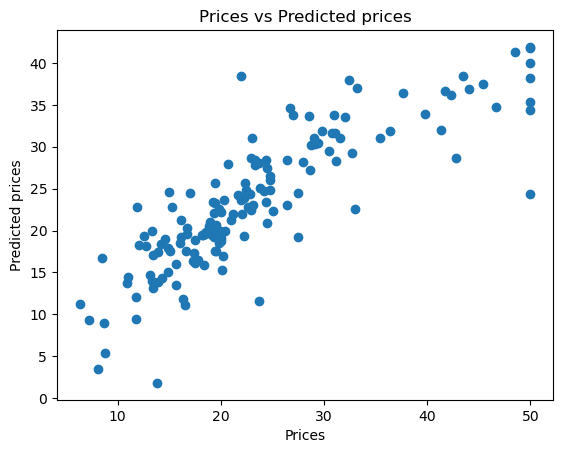

In [33]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

##### There are four assumptions associated with a linear regression model:
* Linearity: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
* Homoscedasticity: The variance of residual is the same for any value of X.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.

Text(0, 0.5, 'residuals')

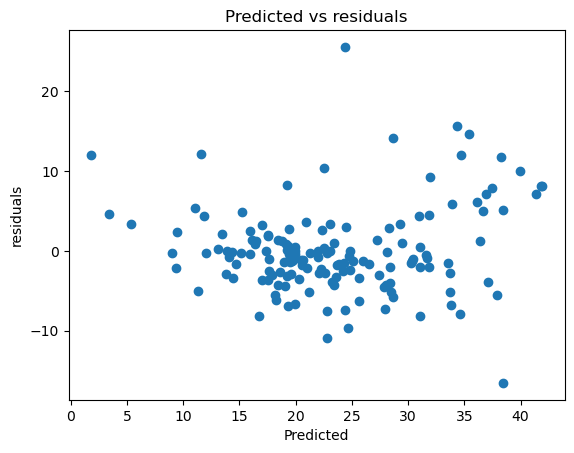

In [34]:
# Checking Residuals
plt.scatter(y_pred_test,y_test-y_pred_test)
plt.title('Predicted vs residuals')
plt.xlabel('Predicted')
plt.ylabel('residuals')

* There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied.